In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics

# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Import data

In [118]:
data = pd.read_csv('GameData_backup_with_review.csv', dtype={"owner_cat" : str} ,low_memory=0, header=0 , keep_default_na=False , encoding='ANSI')

# Import LabelEncoder
from sklearn import preprocessing

# Spliting data into Feature and
#,'18+','Casual' , 'Indie', 'Free To Play', 'RPG' , 'Strategy' ,'Sports', 'Simulation'  , 'Racing','Massivley Multiplayer' ,'Act_Adv'
X=data[['positive', 'price', 'total_lang','18+','Casual' , 'Indie', 'Free to Play', 'RPG' , 'Strategy' ,'Sports', 'Simulation'  , 'Racing','Massively Multiplayer' ,'Act_Adv']]
y=data['owner_cat']

In [119]:
X

,positive,price,total_lang,18+,Casual,Indie,Free to Play,RPG,Strategy,Sports,Simulation,Racing,Massively Multiplayer,Act_Adv
0,15980,9.9,1,0,0,0,0,0,0,0,0,0,0,1
1,38298,9.9,16,0,0,0,0,0,0,0,0,0,0,1
2,583694,9.9,26,0,0,0,0,0,0,0,0,0,0,1
3,1415893,0.0,26,0,0,0,1,0,1,0,0,0,0,1
4,18973,0.0,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41270,7,9.9,1,0,1,0,0,0,0,0,0,0,0,1
41271,7,9.9,1,0,1,0,0,0,0,0,0,0,0,1
41272,1,9.9,1,0,1,0,0,0,0,0,0,0,0,1
41273,3,9.9,1,0,1,0,0,0,0,0,0,0,0,1


# Split data to 7:3

In [120]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)  # 70% training and 30% test


print('X Train', X_train.shape)
print('X Test', X_test.shape)

print('Y Train', y_train.shape)
print('Y Test', y_test.shape)

X Train (28892, 14)
X Test (12383, 14)
Y Train (28892,)
Y Test (12383,)


# MLP 

# Init Model

In [121]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(5),
                    random_state=3,
                    learning_rate_init=0.01,
                    solver="adam",
                    activation='relu')

# Fit data onto the model
model = clf.fit(X_train,y_train)

print(model)

expected_y  = y_test
predicted_y = model.predict(X_test)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [123]:
print(metrics.classification_report(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      8460
           1       0.30      0.75      0.43       511
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
           2       0.39      0.16      0.23      1632
           3       0.29      0.34      0.31       776
           4       0.00      0.00      0.00       222
           5       0.31      0.05      0.08       545
           6       0.00      0.00      0.00       129
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        82
           9       0.00      0.00      0.00         4

    accuracy                           0.73     12383
   macro avg       0.17      0.17      0.15     12383
weighted avg       0.68      0.73      0.69     12383



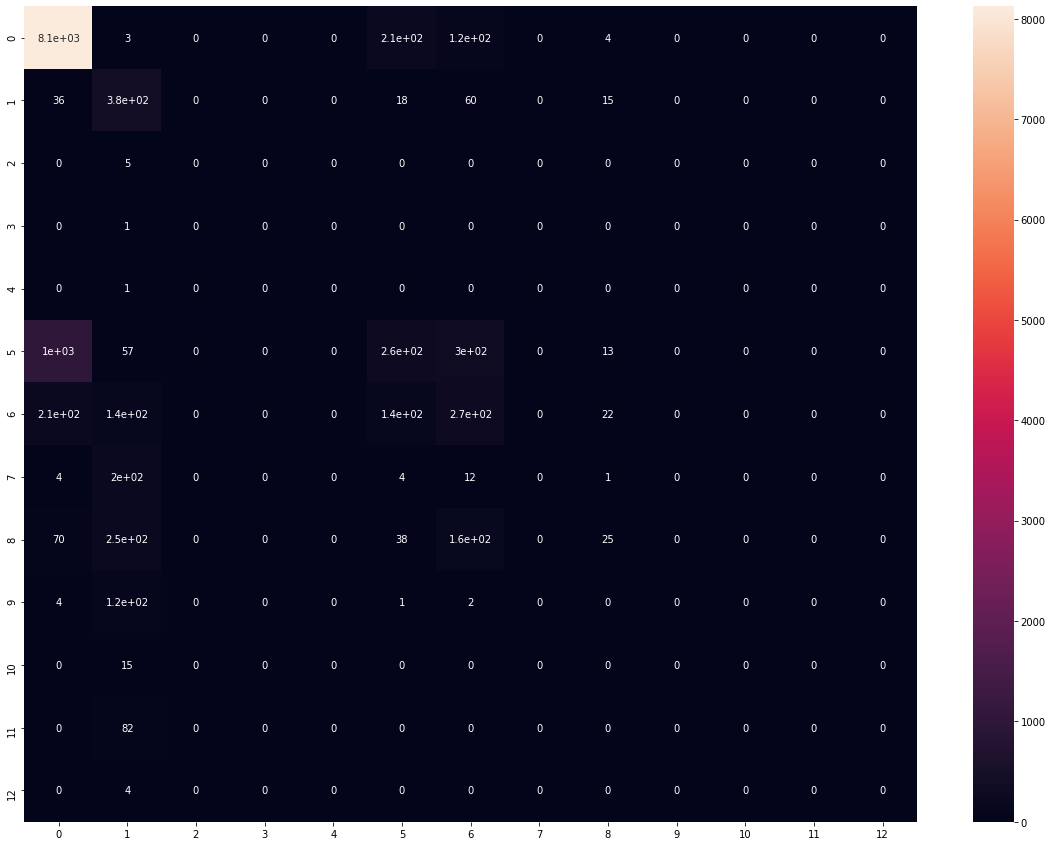

In [125]:
import seaborn as sns

f = plt.figure(figsize=(20,15))
sns.heatmap(metrics.confusion_matrix(expected_y, predicted_y), ,  annot=True)